# Confidence Intervals

# In statistics, a percentile is a term that describes how a score compares to other scores from the same set. While there is no universal definition of percentile, it is commonly expressed as the percentage of values in a set of data scores that fall below a given value.

#  Example S = [2,7, 3, 1, 9];
# S_sorted = [1, 2, 3, 7, 9];

# 80th percentile  = 7    i.e (80/100) * 5  ordered element







In [1]:
#These are libraries that you should import if needed for your notebook.
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
from google.colab import files

In [3]:
# Percentiles

# Creat an array

s = np.array([40, 12, 56, 79, 90, 44])
s

array([40, 12, 56, 79, 90, 44])

In [4]:
# Sort the code
np.sort(s)

array([12, 40, 44, 56, 79, 90])

In [5]:
# Let determine the 55th percentile of the array

np.arange(1,7)/6

array([0.16666667, 0.33333333, 0.5       , 0.66666667, 0.83333333,
       1.        ])

In [6]:
np.sort(s)[3]

56

In [7]:
# Alternatively: One line of code
np.percentile(s, 55)

53.0

## Inference: Estimation

# How do we calculate the value of an unknown parameter?
#If you have a census (i.e., data for the whole population): Just calculate the parameter, and you’re done


# But if you don’t have a census:


# Take a random sample from the population


# Use a statistic as an estimate of the parameter


# One sample ➜ One estimate

 # But the random sample could have come out differently

# So the estimate could have been different

# Big question: How different would it be if we did it again?


In [8]:
#upload the file san francisco .csv
uploaded=files.upload()

Saving san_francisco_2019.csv to san_francisco_2019.csv


In [9]:
#Read the file san_franscisco.csv
sf = pd.read_csv('san_francisco_2019.csv')

In [10]:
# Lets view the dataframe
sf

,Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
0,Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332.0,0.0,40059.0,131391.0
1,Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241.0,0.0,49279.0,172520.0
2,Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715.0,0.0,46752.0,162468.0
3,Public Protection,Adult Probation,Information Systems,IS Business Analyst-Principal,159394.0,0.0,57312.0,216706.0
4,Public Protection,Adult Probation,Information Systems,IS Programmer Analyst,70035.0,0.0,28671.0,98706.0
...,...,...,...,...,...,...,...,...
44520,General Administration & Finance,Treasurer/Tax Collector,Revenue,"Investigator, Tax Collector",44961.0,42.0,19546.0,64549.0
44521,General Administration & Finance,Treasurer/Tax Collector,Revenue,"Investigator, Tax Collector",85706.0,107.0,38924.0,124737.0
44522,General Administration & Finance,Treasurer/Tax Collector,Revenue,"Investigator, Tax Collector",101403.0,0.0,43185.0,144587.0
44523,General Administration & Finance,Treasurer/Tax Collector,Revenue,"Pr Investigator, Tax Collector",113738.0,397.0,47104.0,161240.0


In [12]:
# Who made the most money show the first 5
sf.sort_values('Total Compensation', ascending=False).head(5)



,Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
43936,General Administration & Finance,Retirement Services,Administrative & Mgmt (Unrep),Chief Investment Officer,577633.0,0.0,146398.0,724031.0
43937,General Administration & Finance,Retirement Services,Unassigned,Managing Director,483072.0,0.0,134879.0,617951.0
43938,General Administration & Finance,Retirement Services,Unassigned,Managing Director,482649.0,0.0,134905.0,617554.0
43940,General Administration & Finance,Retirement Services,Unassigned,Managing Director,451507.0,0.0,120276.0,571784.0
43939,General Administration & Finance,Retirement Services,Unassigned,Managing Director,449378.0,0.0,120857.0,570235.0


In [13]:
# Who made the least money show the first 5
sf.sort_values('Total Compensation', ascending=True).head(5)

,Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
18526,"Public Works, Transportation & Commerce",Municipal Transportation Agcy,"Clerical, Secretarial & Steno",Senior Clerk Typist,0.0,0.0,0.0,0.0
43234,General Administration & Finance,Human Resources,Public Service Aide,Public Service Trainee,0.0,0.0,0.0,0.0
22329,"Public Works, Transportation & Commerce",Public Utilities Commission,"Clerical, Secretarial & Steno",Senior Clerk,0.0,0.0,0.0,0.0
32865,Community Health,Public Health,Public Service Aide,PS Aide Health Services,0.0,0.0,0.0,0.0
38732,Culture & Recreation,Recreation And Park Commission,Recreation,Pool Lifeguard,0.0,0.0,0.0,0.0


In [15]:
# # $15/hr, 20 hr/wk, 50 weeks

min_salary = 15 * 20* 50
sf = sf[sf['Salary'] > min_salary]

In [16]:
# lets us now count the new number of Sf
sf.shape

(37103, 8)

<Axes: >

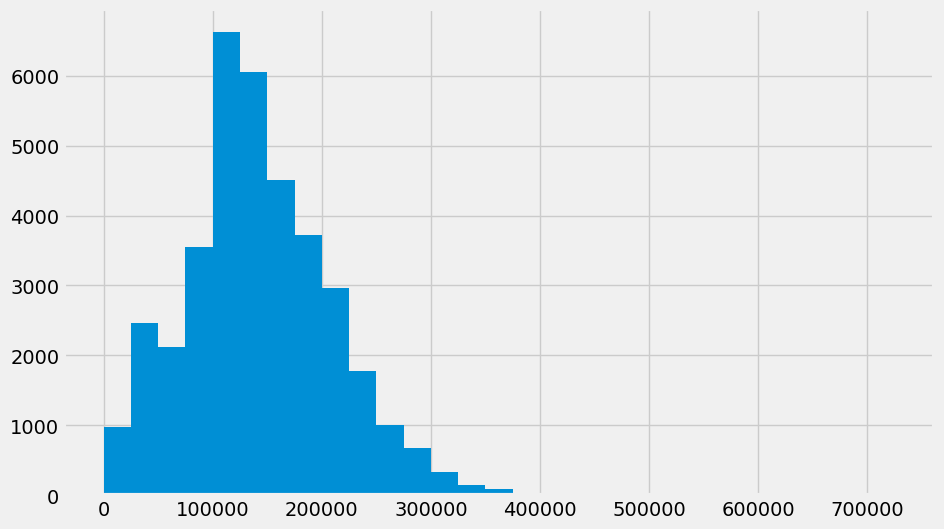

In [17]:
# Plot the histogram distribution of the Total Compensation column  with bins ranging from 0 to 726000 with step size of 25000 with rotated x - axis xticks vertical
plots.figure(figsize=(10, 6))

sf['Total Compensation'].hist(bins=np.arange(0, 726000, 25000))

## Parameter: Median Total Compensation

In [18]:
# The median of the Total Compensation column
sf['Total Compensation'].median()

135747.0

In [19]:
# The 50th percentile of the Total Compensation column
pop_median = np.percentile(sf['Total Compensation'].values, 50)
pop_median

135747.0

# Estimate the Parameter with the assumption it is unknown

In [20]:
# Sample sf without replacement 400 times
our_sample = sf.sample(400, replace=False)

<Axes: >

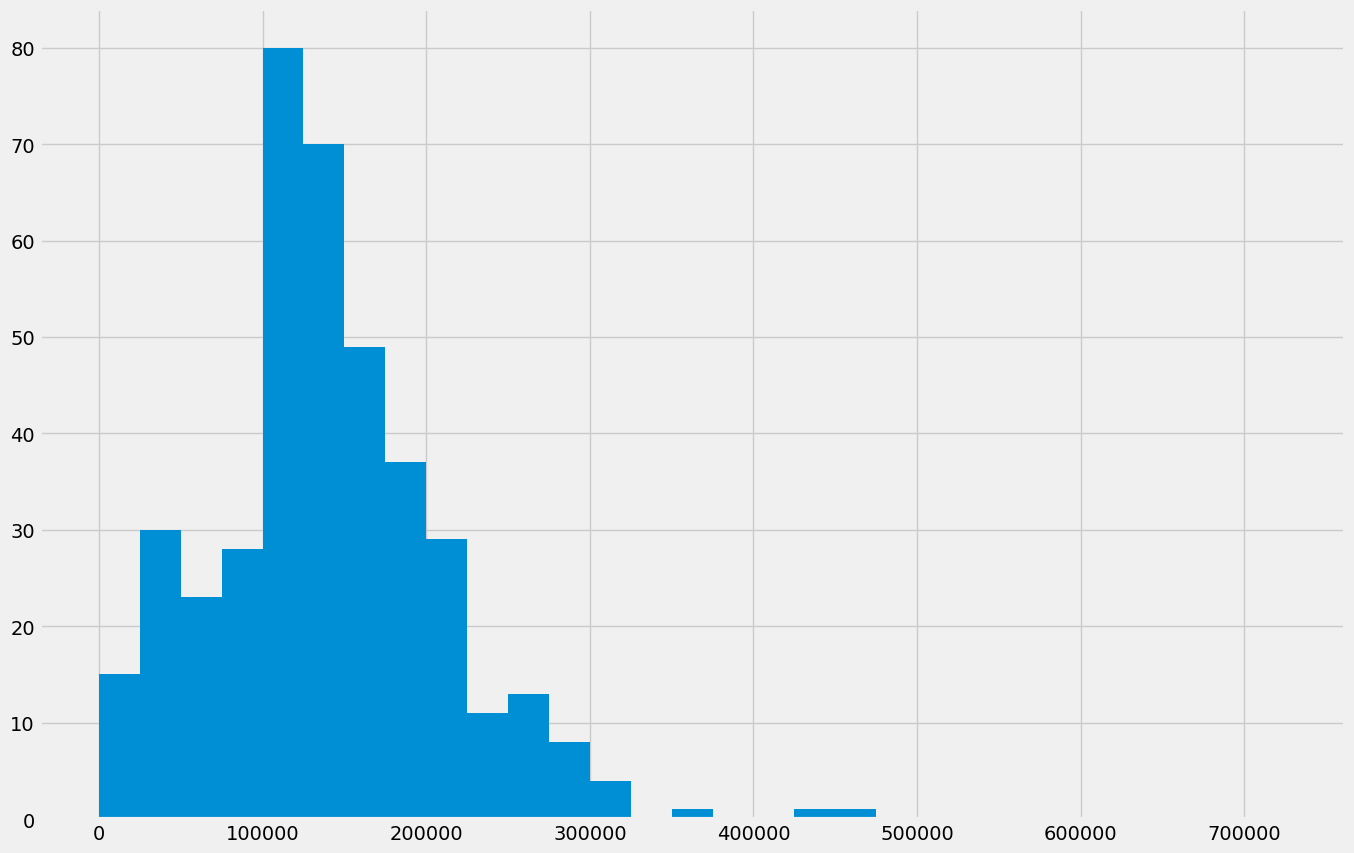

In [21]:
# Plot the histogram distribution of our_sample
plots.figure(figsize=(15, 10))
our_sample['Total Compensation'].hist(bins=np.arange(0, 726000, 25000))

In [22]:
# The 50th percentile of the Total Compensation column
np.percentile(our_sample['Total Compensation'].values, 50)


133180.0

 # But the random sample could have come out differently

# So the estimate could have been different

# Big question: How different would it be if we did it again?

In [ ]:
# But in the real world we won't be able to keep going back to the population. How to generate a new random sample without going back to the population?

## Quantifying Uncertainty

* The estimate is usually not exactly right:
* Estimate = Parameter + Error
* Error = Estimate - Parameter
* Parameter is fixed.
* Error variability is due to Estimate variability.
* How accurate is a typical Estimate?
* How big is a typical Error?
* When we have a census, we can do this by simulation


## Bootstrap

Sample randomly
 - from the original sample
 - with replacement
 - the same number of times as the original sample size

In [23]:
# Default behavior of tbl.sample:
# at random with replacement,
# the same number of times as rows of tbl


bootstrap_sample = our_sample.sample(400, replace=True)

<Axes: >

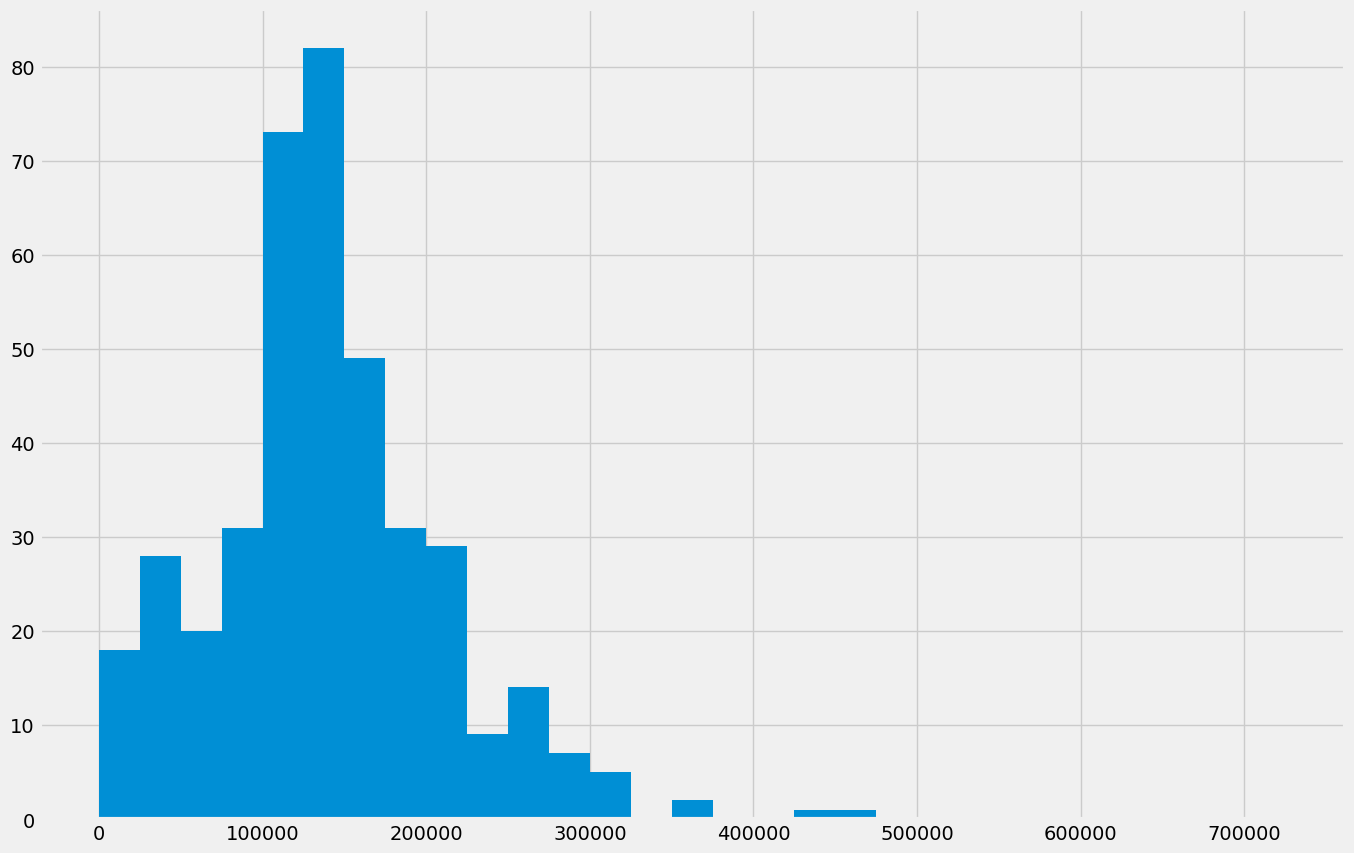

In [24]:
# Plot the histogram distribution of bootstrap_sample
plots.figure(figsize=(15, 10))
bootstrap_sample['Total Compensation'].hist(bins=np.arange(0, 726000, 25000))

## Bootstrap Sample Median
This is one estimate of the population median.

In [25]:
# The 50th percentile of the Total Compensation column
np.percentile(bootstrap_sample['Total Compensation'].values, 50)

134986.0

In [26]:
#def one_bootstrap_median(a):
def one_bootstrap_median(a):
    # draw the bootstrap sample
    resample = our_sample.sample(a, replace=True)
    # return the median total compensation in the bootstrap sample
    return np.percentile(resample['Total Compensation'].values, 50)

In [27]:
#one_bootstrap_median(400)
one_bootstrap_median(400)

133679.0

In [28]:
# Generate the medians of 1000 bootstrap samples
num_repetitions = 1000
bstrap_medians = np.array([])
for i in np.arange(num_repetitions):
    bstrap_medians = np.append(bstrap_medians, one_bootstrap_median(400))

In [29]:
# Create a new table called reampled_medians with column titled 'Bootsrap sample median' with values of a array bstrap_medians
resampled_medians = pd.DataFrame({'Bootstrap Sample Median': bstrap_medians})
resampled_medians

,Bootstrap Sample Median
0,136445.0
1,135664.0
2,134642.0
3,137253.0
4,136054.5
...,...
995,135083.0
996,138150.5
997,126333.5
998,131811.5


In [ ]:


##resampled_medians = pd.DataFrame({'Bootstrap Sample Median': bstrap_medians})
median_bins=np.arange(120000, 160000, 2000)
#plots.figure(figsize=(18, 10))

#resampled_medians.hist(bins = median_bins)

## Plotting parameters; you can ignore this code
#parameter_green = '#32CD32'
##plots.ylim(-0.000005, 0.00014)
#plots.xticks(rotation=90)
#plots.scatter(pop_median, 0, color=parameter_green, s=100, zorder=2)
#plots.title('Bootstrap Medians and the Parameter (Green Dot)');

<Figure size 1800x1000 with 0 Axes>

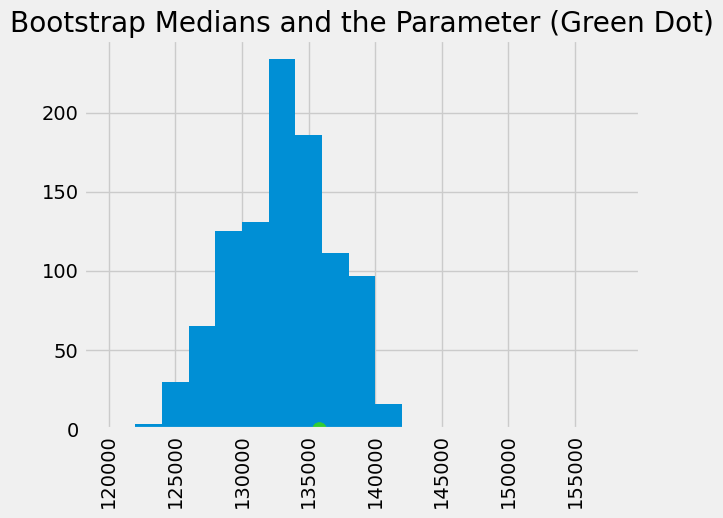

In [30]:
resampled_medians = pd.DataFrame({'Bootstrap Sample Median': bstrap_medians})
median_bins=np.arange(120000, 160000, 2000)
plots.figure(figsize=(18, 10))

resampled_medians.hist(bins = median_bins)

# Plotting parameters; you can ignore this code
parameter_green = '#32CD32'
#plots.ylim(-0.000005, 0.00014)
plots.xticks(rotation=90)
plots.scatter(pop_median, 0, color=parameter_green, s=100, zorder=2)
plots.title('Bootstrap Medians and the Parameter (Green Dot)');

## Percentile Method: Middle 95% of the Bootstrap Estimates

In [31]:
left = np.percentile(bstrap_medians, 2.5)
right = np.percentile(bstrap_medians,97.5)

np.array([left, right])

array([125941.   , 139123.475])

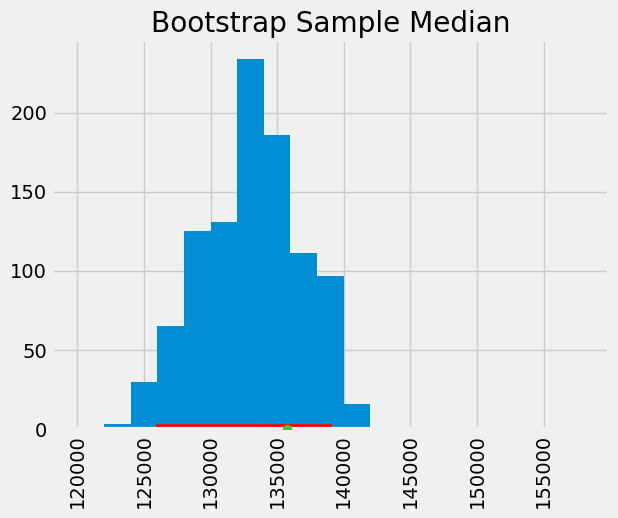

In [32]:
resampled_medians.hist(bins = median_bins)

# Plotting parameters; you can ignore this code
#plots.ylim(-0.000005, 0.00014)
plots.xticks(rotation=90)
plots.plot(np.array([left, right]), np.array([0, 0]), color='red', lw=7, zorder=1)
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=100);